In [25]:
# importing the packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import keras
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
# reading the data into a dataframe
data = pd.read_csv("data/Churn_Modelling.csv")
# display the dataframe
data.head(10)

,RowNumber,CustomerId,name,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,roshan,619,Chennai,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,lodha,608,Bangalore,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,garcia,502,Chennai,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,paud,699,Chennai,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,kalbhor,850,Bangalore,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,zahaldar,645,Bangalore,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,tamhankar,822,Chennai,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,vichare,376,Mumbai,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,girdhar,501,Chennai,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,shetty,684,Chennai,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
# reading the data into a dataframe
data = pd.read_csv("data/Churn_Modelling.csv")

# split the dataframe into dependent and independent variables
X = data.iloc[:, 3:13].values
y =data.iloc[:, 13].values

In [4]:
# encode the gender column
label_encoder_gender = LabelEncoder()
X[:, 2] = label_encoder_gender.fit_transform(X[:, 2])
# encode the geography column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## recorded information
# female = 0, male = 1
# Chennai = [1,0], Bangalore = [0,0], Mumbai = [0,1]

In [5]:
# split the dependent and independent variables into 
# training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
# scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# save the scaler instance to be called in the future
dump(scaler, "model/scaler_instance.joblib")

['model/scaler_instance.joblib']

In [6]:
# Initializing the ANN
# The Optimal Parameters for this model is chosen using grid search CV
classifier = Sequential()

# Adding the input layer and hidden layer
classifier.add(Dense(units=6, activation='relu', input_dim=11))
classifier.add(Dropout(rate=0.1))

# Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(rate=0.1))

# Adding the oputput layer
classifier.add(Dense(units=1, activation='sigmoid'))

# compiling the ANN
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the ANN to the training set
classifier.fit(X_train, y_train, batch_size=25, epochs=500)

# save the keras model as an instance
classifier.save("model/my_model.keras", overwrite=True)
dump(classifier, "model/classifier.joblib")




Epoch 1/500


320/320 [==============================] - 1s 906us/step - loss: 0.5826 - accuracy: 0.7519
Epoch 2/500
320/320 [==============================] - 0s 819us/step - loss: 0.4807 - accuracy: 0.7983
Epoch 3/500
320/320 [==============================] - 0s 844us/step - loss: 0.4627 - accuracy: 0.7983
Epoch 4/500
320/320 [==============================] - 0s 898us/step - loss: 0.4553 - accuracy: 0.7983
Epoch 5/500
320/320 [==============================] - 0s 841us/step - loss: 0.4502 - accuracy: 0.7983
Epoch 6/500
320/320 [==============================] - 0s 860us/step - loss: 0.4460 - accuracy: 0.7983
Epoch 7/500
320/320 [==============================] - 0s 872us/step - loss: 0.4438 - accuracy: 0.7983
Epoch 8/500
320/320 [==============================] - 0s 879us/step - loss: 0.4417 - accuracy: 0.7983
Epoch 9/500
320/320 [==============================] - 0s 816us/step - loss: 0.4407 - accuracy: 0.7983
Epoch 10/500
320/320 [==============================] - 0s 822us/step

INFO:tensorflow:Assets written to: C:\Users\Jacob\AppData\Local\Temp\tmpw4t033ob\assets


['model/classifier.joblib']

In [7]:
# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("The confusion Matrix is: \n", conf_matrix,"\nThe accuracy is: ", accuracy)

63/63 [==============================] - 0s 788us/step
The confusion Matrix is: 
 [[1499   78]
 [ 190  233]] 
The accuracy is:  0.866


In [8]:
from joblib import load
from keras.models import load_model

scaler = load("model/scaler_instance.joblib")
classifier = load_model("model/my_model.keras")

In [9]:
# Predicting a Single new customer
"""
Geography = Bangalore
Credit Score = 600
Gender = Male
Age = 40
Tenure = 3
Balance = 60000
Number of Products = 2
Has Credit Card = Yes
Is Active Member = Yes
Estimated Salary = 50000
"""
new_prediction = classifier.predict(scaler.transform(np.array([[1,0,502,0,42,8,159660.8,3,1,0,113931.6]])))
new_pred = (new_prediction > 0.5)
new_prediction[0][0]

1/1 [==============================] - 0s 48ms/step


0.726998

In [60]:
# Predict on the test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

# save the classification report
with open("model/classification_report.txt", "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Classification Report:\n{report}")

63/63 [==============================] - 0s 917us/step
Accuracy: 0.866
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1577
           1       0.75      0.55      0.63       423

    accuracy                           0.87      2000
   macro avg       0.82      0.75      0.78      2000
weighted avg       0.86      0.87      0.86      2000



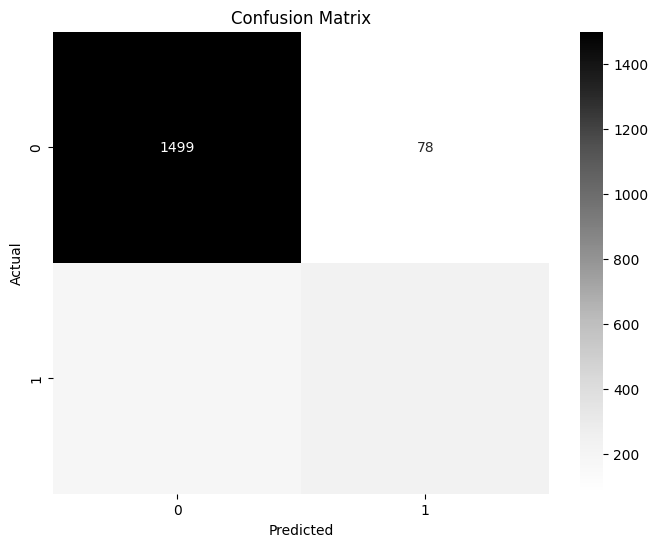

In [59]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap with visible values and greyscale color map
plt.figure(figsize=(8,6))  # Adjust the size of the plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys')

# Set the labels for x-axis and y-axis
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("model/charts/heatmap.jpg")

# Show the plot
plt.show()
